In [3]:
# Prepare envs
##  Libs
import sys
proj_path_str='..'
sys.path.append(proj_path_str)
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns

## set up Fonts for vis
import matplotlib.pyplot as plt
plt.rcParams['font.serif'] = 'Times New Roman' #Times New Roman
plt.rcParams['font.family'] = 'DeJavu Serif' #DeJavu Serif 	 [ 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace' ]
#matplotlib.rcParams['font.sans-serif'] = "Times New Roman"

## Prepare folders and files
data_dir = Path(proj_path_str) / 'data'
fig_dir = Path(proj_path_str) / 'figs'
data_tab_file  = data_dir / 'causal_literature_darta.csv'

# data preproc
## read data
data_df = pd.read_csv(data_tab_file, sep=',', header=0, index_col=None)
data_df = data_df.iloc[1:, [0,1,2,4,5,6]].copy()
data_df.sort_values(by='Year', ignore_index=True, inplace=True)
data_df.iloc[:, 1:] = data_df.iloc[:, 1:].cumsum(axis=0).apply(lambda x:np.log10(x))
#data_df.cumsum(axis=0)
## filter data before 1980
col_labels = data_df.columns
col_labels

Index(['Year', 'Causal', 'Clinical', 'Neurology', 'Psychiatry',
       'Neuroimaging'],
      dtype='object')

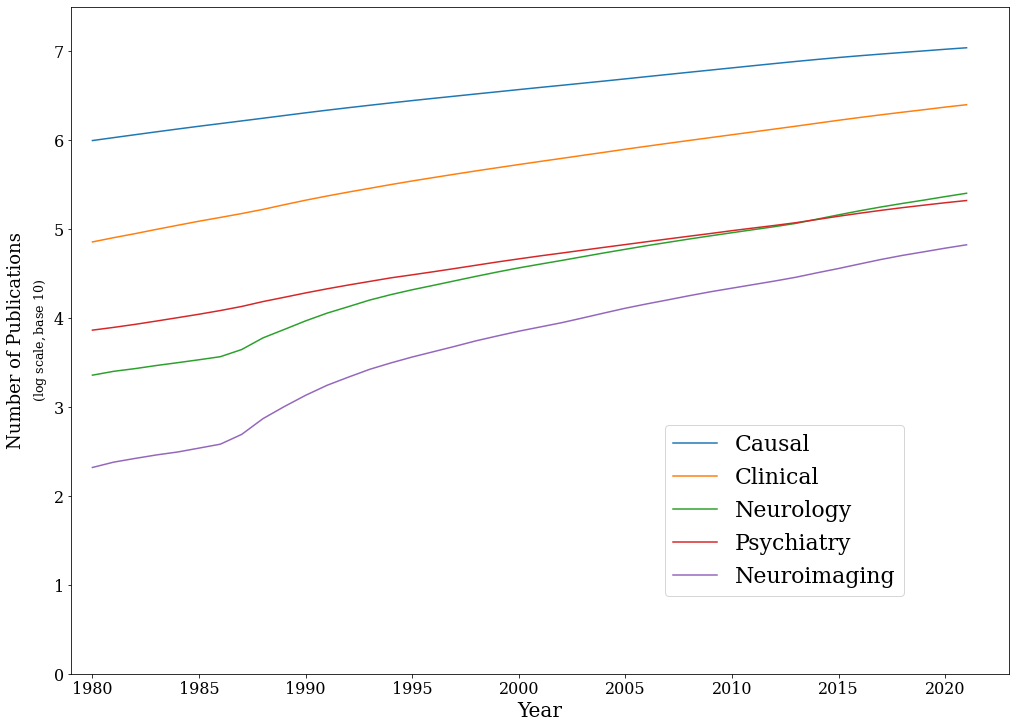

In [42]:
# 
save_fig = 1
figure_size=(14, 10)

X_LIM=[1979, 2023]
Y_LIM=[0, 7.5]

#X_TICKS=[1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2022]
#X_TICK_LABELS=['before 1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020', '2022']

vis_df=pd.melt(data_df, id_vars=['Year'], 
               var_name='Research Fields', 
               value_vars=col_labels[1:], 
               value_name='Number of Publications')

vis_cols = vis_df.columns

f1, ax_lineplot = plt.subplots(figsize=figure_size, facecolor='w', edgecolor='lightgray', constrained_layout=True,) 
ax_lineplot = sns.lineplot(data=vis_df, x=vis_cols[0], y=vis_cols[2], hue=vis_cols[1], legend='auto')

plt.xlabel(vis_cols[0], fontsize=20)
plt.ylabel(u'Number of Publications\n$\\regular_{(log\ scale, base\ 10)}$', fontsize=18)
plt.xlim(X_LIM)
plt.ylim(Y_LIM)
for label in ax_lineplot.get_xticklabels():
    label.set_fontsize(16)
for label in ax_lineplot.get_yticklabels():
    label.set_fontsize(16)
plt.legend(loc=4, bbox_to_anchor=(0.9, 0.1), fontsize=22)
#plt.title('Causal related publications (1980 ~ 2022)', fontsize=24)

if save_fig: 
    print('saving...'); 
    f1.savefig(( fig_dir / 'Fig1-causal_trend.jpg'), 
    dpi=330, bbox_inches='tight', pad_inches=0.1);

In [ ]:
raw_df = data_df.copy()
print('Summary statistics of original open science events:')
display(raw_df.groupby('Events').describe())
# 
print('\nChange WE LOST to OpenMinds:')
data_df.loc[:,'Events'] = [ 'OpenMinds' if x =='WE LOST' else x for x in data_df.Events]
print('Summary statistics of open+ events:')
display(data_df.groupby('Events').describe())
data_df['Ref']=data_df['Topic']

events_list = ['OpenTransfer', 'OpenMinds', 'OpenTalks', 'OpenTutorials', 'OpenPlus']
ref_list    = ['Face stimulus and tool collection', 'Sam Gershman, Advice for young investigators', 'E.-J. (Eric-Jan) Wagenmakers, Bayes Factor', 'Zhuoyi Fan, Classical statistics: p-value, CI and power', 'Christmas special event: Merry Industry']

for event_str in events_list:
    index_ref=events_list.index(event_str)
    max_indx = data_df[data_df['Events']==event_str]['Reads'].idxmax()
    data_df.iloc[max_indx, 4]= ref_list[index_ref]
    print("The first 3 "+event_str+" :")
    display(data_df[data_df['Events']==event_str].sort_values('Date', ascending=1).iloc[:3,:])



In [ ]:
# events scatter and line plot
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.units as munits
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams['font.serif'] = 'Times New Roman' #Times New Roman
plt.rcParams['font.family'] = 'DeJavu Serif' #DeJavu Serif 	 [ 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace' ]
#matplotlib.rcParams['font.sans-serif'] = "Times New Roman"
# Then, "ALWAYS use sans-serif fonts"

converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter

save_fig=1
vis_df = data_df.copy()
events_list = ['OpenTransfer', 'OpenMinds', 'OpenTalks', 'OpenTutorials', 'OpenPlus']
color_list  = ['#e41a1c', '#ff7f00', '#377eb8', '#4daf4a',   '#984ea3']
marker_list = ['o', '^', 's', 'h', 'd' ]
#vis_df['Date'] = [custom_date(float(x)) for x in vis_df['Date']]

figure_size=(14, 10)
X_LIM=['2017-06', '2022-03']
X_LIM=tuple([np.datetime64(x) for x in X_LIM])
Y_TICKS=[2, 3, 4, 5]
Y_TICK_LABELS=['100', '1,000', '10,000', '100,000']
locator = mdates.AutoDateLocator(minticks=5, maxticks=12)
formatter = mdates.ConciseDateFormatter(locator)

f1, ax_lineplot = plt.subplots(figsize=figure_size, facecolor='w', edgecolor='lightgray', constrained_layout=True,) 

for event_str in events_list:
    index_plt=events_list.index(event_str)
    tmp_df=vis_df[vis_df['Events']==event_str].copy().reset_index(drop=True);
    max_indx = tmp_df['Reads'].idxmax()
    x_max=tmp_df.iloc[max_indx, 1]
    y_max=tmp_df.iloc[max_indx, 2]
    text_max=tmp_df.iloc[max_indx, 4]
    print(event_str, max_indx, x_max, y_max, text_max)
    plt.scatter(tmp_df.Date, np.log10(tmp_df.Reads), alpha=0.3, sizes=tmp_df.Reads/15, c=color_list[index_plt], marker=marker_list[index_plt], label='_nolegend_')
    tmp_df=tmp_df.sort_values(by=['Date']).copy()
    tmp_df['Reads']=np.cumsum(tmp_df.Reads)
    #display(tmp_df)
    #ax_lineplot.annotate(text_max, (mdates.date2num(x_max), np.log10(y_max)+index_plt*0.05), xytext=(-300, -240), c=color_list[index_plt],
    #                     textcoords='offset points', fontsize=14, arrowprops=dict(arrowstyle="->", facecolor=color_list[index_plt], edgecolor=color_list[index_plt], shrinkA=5, shrinkB=5, connectionstyle="angle,angleA=0,angleB=90,rad=30"))
    # "angle,angleA=0,angleB=90,rad=30"
    plt.plot(tmp_df.Date, np.log10(tmp_df.Reads), linewidth=4, alpha=0.75, marker=marker_list[index_plt], markersize=12, c=color_list[index_plt]) #, alpha=0.65
    #lineplot
    
for label in ax_lineplot.get_xticklabels():
    label.set_fontsize(16)
for label in ax_lineplot.get_yticklabels():
    label.set_fontsize(16)
ax_lineplot.xaxis.set_major_locator(locator)
ax_lineplot.xaxis.set_major_formatter(formatter)

plt.xlabel('Time', fontsize=24)
plt.ylabel('Number of reads', fontsize=25)
plt.xlim(X_LIM)
plt.yticks(Y_TICKS, Y_TICK_LABELS)

plt.title('Reads of COSN events posts (2017 Jun. ~ 2022 Jan.)', fontsize=20)
plt.legend(events_list, fontsize=18)
ax_lineplot.fmt_xdata = DateFormatter('%Y-%m')
if save_fig: print('saving...'); f1.savefig(( fig_dir / 'Fig3-cosn_events_no-annotation.jpg'), dpi=300, bbox_inches='tight', pad_inches=0.1);

In [ ]:
# top 3 reads for all the events
for event_str in events_list:
    print('Top 5 most reads for '+event_str)
    display(data_df[data_df['Events']==event_str].sort_values(by=['Reads'], ascending=False).iloc[:5,:])